PRAVEENA ANAND [CH.SC.U4CSE23044]

**PRINCIPAL COMPONENT ANALYSIS:**

**Real Estate Agent:**

Import Required Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Create Synthetic Dataset:

In [3]:
np.random.seed(42)
n = 200

data = pd.DataFrame({
    "Price": np.random.randint(50000, 500000, n),              # property price
    "Size_sqft": np.random.randint(500, 4000, n),              # property size
    "Bedrooms": np.random.randint(1, 6, n),                    # number of bedrooms
    "Bathrooms": np.random.randint(1, 4, n),                   # number of bathrooms
    "Age_of_Property": np.random.randint(1, 50, n),            # age in years
    "Days_on_Market": np.random.randint(10, 400, n),           # listing days
})

Define Sold_Status Based on Conditions:

In [4]:
data["Sold_Status"] = np.where(
    (data["Price"] < 300000) &
    (data["Size_sqft"] > 1000) &
    (data["Age_of_Property"] < 30) &
    (data["Days_on_Market"] < 180),
    "Sold", "Not Sold"
)

In [5]:
print("Dataset Snapshot:")
print(data.head())

Dataset Snapshot:
    Price  Size_sqft  Bedrooms  Bathrooms  Age_of_Property  Days_on_Market  \
0  171958       1863         1          1               22              43   
1  196867       2481         5          3               27             120   
2  181932       1854         4          1               49             273   
3  415838       2163         5          3               13             378   
4  309178       2029         3          2               33             245   

  Sold_Status  
0        Sold  
1        Sold  
2    Not Sold  
3    Not Sold  
4    Not Sold  


Exploratory Data Analysis (EDA):

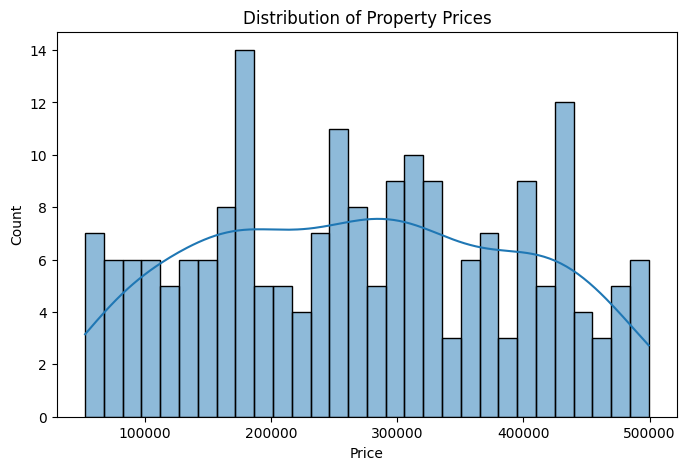

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of Property Prices")
plt.show()

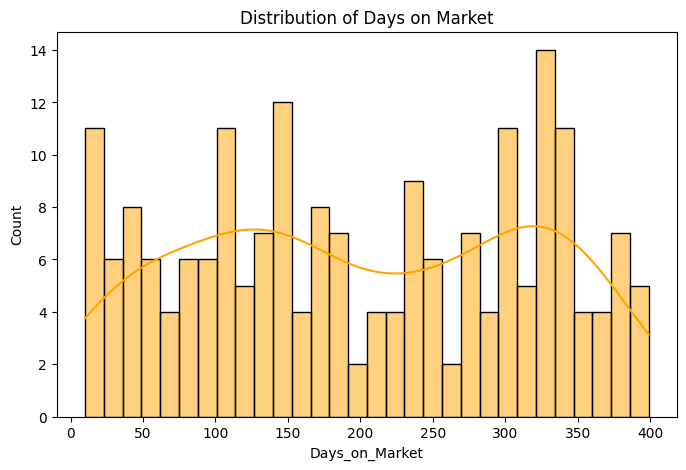

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data['Days_on_Market'], bins=30, kde=True, color="orange")
plt.title("Distribution of Days on Market")
plt.show()

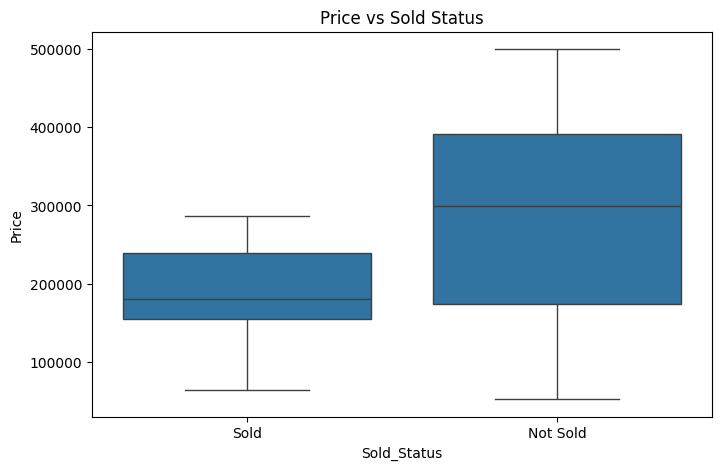

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sold_Status", y="Price", data=data)
plt.title("Price vs Sold Status")
plt.show()

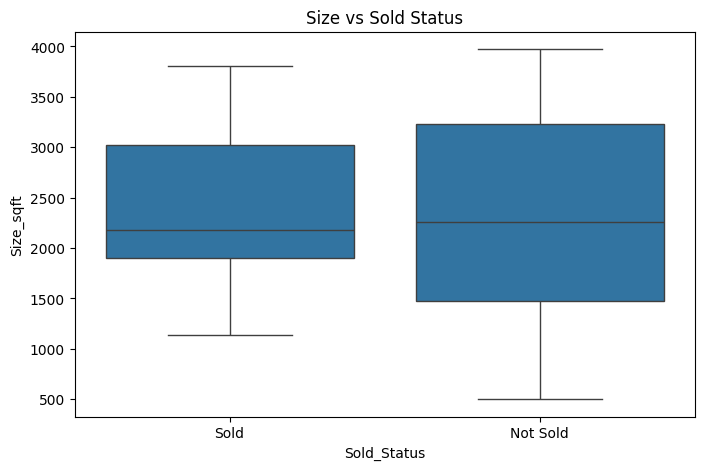

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sold_Status", y="Size_sqft", data=data)
plt.title("Size vs Sold Status")
plt.show()

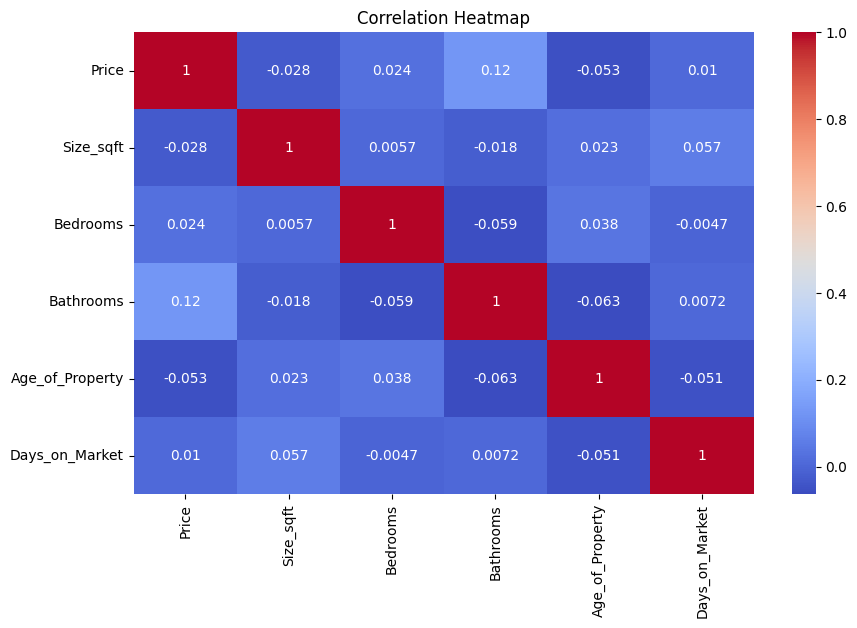

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns="Sold_Status").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

PCA to Find Hidden Patterns:

In [11]:
features = ["Price", "Size_sqft", "Bedrooms", "Bathrooms", "Age_of_Property", "Days_on_Market"]
x = data[features]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

data["PCA1"] = pca_result[:,0]
data["PCA2"] = pca_result[:,1]

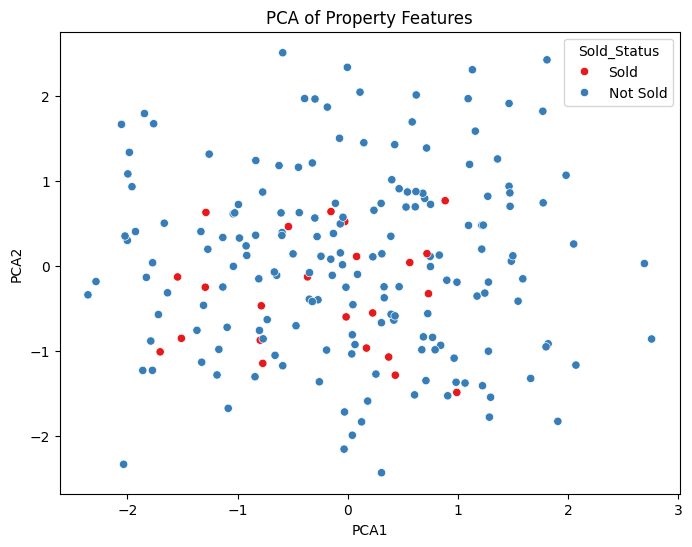

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Sold_Status", data=data, palette="Set1")
plt.title("PCA of Property Features")
plt.show()

Insights:

In [13]:
print("\nInsights for Maggie:")
print("1. Higher priced properties are more likely to remain unsold.")
print("2. Smaller properties (<1000 sqft) and very old ones (>30 years) are harder to sell.")
print("3. Properties sitting on the market > 180 days rarely get sold.")
print("4. Balanced mid-range properties (Price < 300k, Size > 1000 sqft, Age < 30) are selling faster.")


Insights for Maggie:
1. Higher priced properties are more likely to remain unsold.
2. Smaller properties (<1000 sqft) and very old ones (>30 years) are harder to sell.
3. Properties sitting on the market > 180 days rarely get sold.
4. Balanced mid-range properties (Price < 300k, Size > 1000 sqft, Age < 30) are selling faster.
